In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# Matplotlib

## Fonction pour afficher le champs de vecteurs

In [2]:
def afficher_vitesse(coords, values):
    x, y, u, v = coords[:, 0], coords[:, 1], values[:, 0], values[:, 1]    
    ax.quiver(x, y, u, v, color="red", headwidth=1, scale=35)

## Fonction pour afficher le profil

In [3]:
def afficher_profil(coords, color):
        
    verts = coords[0:len(coords):35]    
    poly = Polygon(verts)
    poly.set_color(color)
    
    ax.add_patch(poly)

    

## Fonction pour afficher le maillage

In [4]:
def afficher_maillage(coords):
    tabX, tabY = np.array(coords[:, 0]), np.array(coords[:, 1])

    # Vertical lines
    for n in range(0, 35 * 88, 35):
        xs, ys = tabX[n:n + 35], tabY[n:n + 35]
        plt.plot(xs, ys, c="k")

    # Horizontal lines
    for n in range(0, 35):
        xs, ys = tabX[n:len(tabX):35], tabY[n:len(tabY):35]
        plt.plot(xs, ys, c="k")
    

## Fonction pour affcicher les cellules candidates

In [5]:
def test_sign(vectors):
    for i in range(len(vectors)-1):
        vec1, vec2 = vectors[i], vectors[i+1]

        # Si le produit scalaire est négatif, alors les vecteurs sont opposés
        if np.dot(vec1, vec2) < 0:
            return False

    return True

def afficher_cellules(coords, values, color):
    verts = []

    tabX, tabY = np.array(coords[:, 0]), np.array(coords[:, 1])
    tabU, tabV = np.array(values[:, 0]), np.array(values[:, 1])

    for n in range(34):

        # On travaille avec deux lignes horizontales à la fois
        xs1, ys1, us1, vs1 = tabX[n:len(tabX):35], tabY[n:len(tabY):35], tabU[n:len(tabU):35], tabV[n:len(tabV):35]
        xs2, ys2, us2, vs2 = tabX[n+1:len(tabX):35], tabY[n+1:len(tabY):35], tabU[n+1:len(tabU):35], tabV[n+1:len(tabV):35]
        
        for i in range(0, 87):
            x11, x12, x21, x22 = xs1[i], xs1[i+1], xs2[i], xs2[i+1]
            y11, y12, y21, y22 = ys1[i], ys1[i+1], ys2[i], ys2[i+1]
            u11, u12, u21, u22 = us1[i], us1[i+1], us2[i], us2[i+1]
            v11, v12, v21, v22 = vs1[i], vs1[i+1], vs2[i], vs2[i+1]            

            # Les 4 vecteurs
            vecs = [ [u11, v11], [u12, v12], [u22, v22], [u21, v21] ]

            if not test_sign(vecs):
                verts = [ (x11, y11), (x12, y12), (x22, y22), (x21, y21) ]
                poly = Polygon(verts)
                poly.set_color(color)
                ax.add_patch(poly)

## Fonction pour charger les objets

In [6]:
def charger_objet(obj, limit=0):
    coords = []
    values = []
    count = 0

    file = open(obj, "r")
    angle = 0.
    x, y = 0., 0.
    u, v = 0., 0.

    R = np.zeros((2, 2))

    for line in file.readlines():
        data = line.split()

        if count == 0:
            angle = float(data[2])
            
            theta = np.radians(angle)
            c, s = np.cos(theta), np.sin(theta)
            R = np.array(((c, -s), (s, c)))

            count += 1
            continue

        x, y, u, v = float(data[0]), float(data[1]), float(data[2]), float(data[3])

        # Rotation matrix
        coords.append(np.matmul(R, np.array((x, y))))
        values.append(np.matmul(R, np.array((u, v))))

        if limit != 0 and count == limit: break
        count += 1

    return np.array(coords), np.array(values)

## Function main

[[-0.41746844  0.28158602]
 [-0.41999507  0.28329025]
 [-0.42297935  0.28530317]
 ...
 [-0.77272039  0.52120648]
 [-0.79549671  0.53656931]
 [-0.8192165   0.5525685 ]]


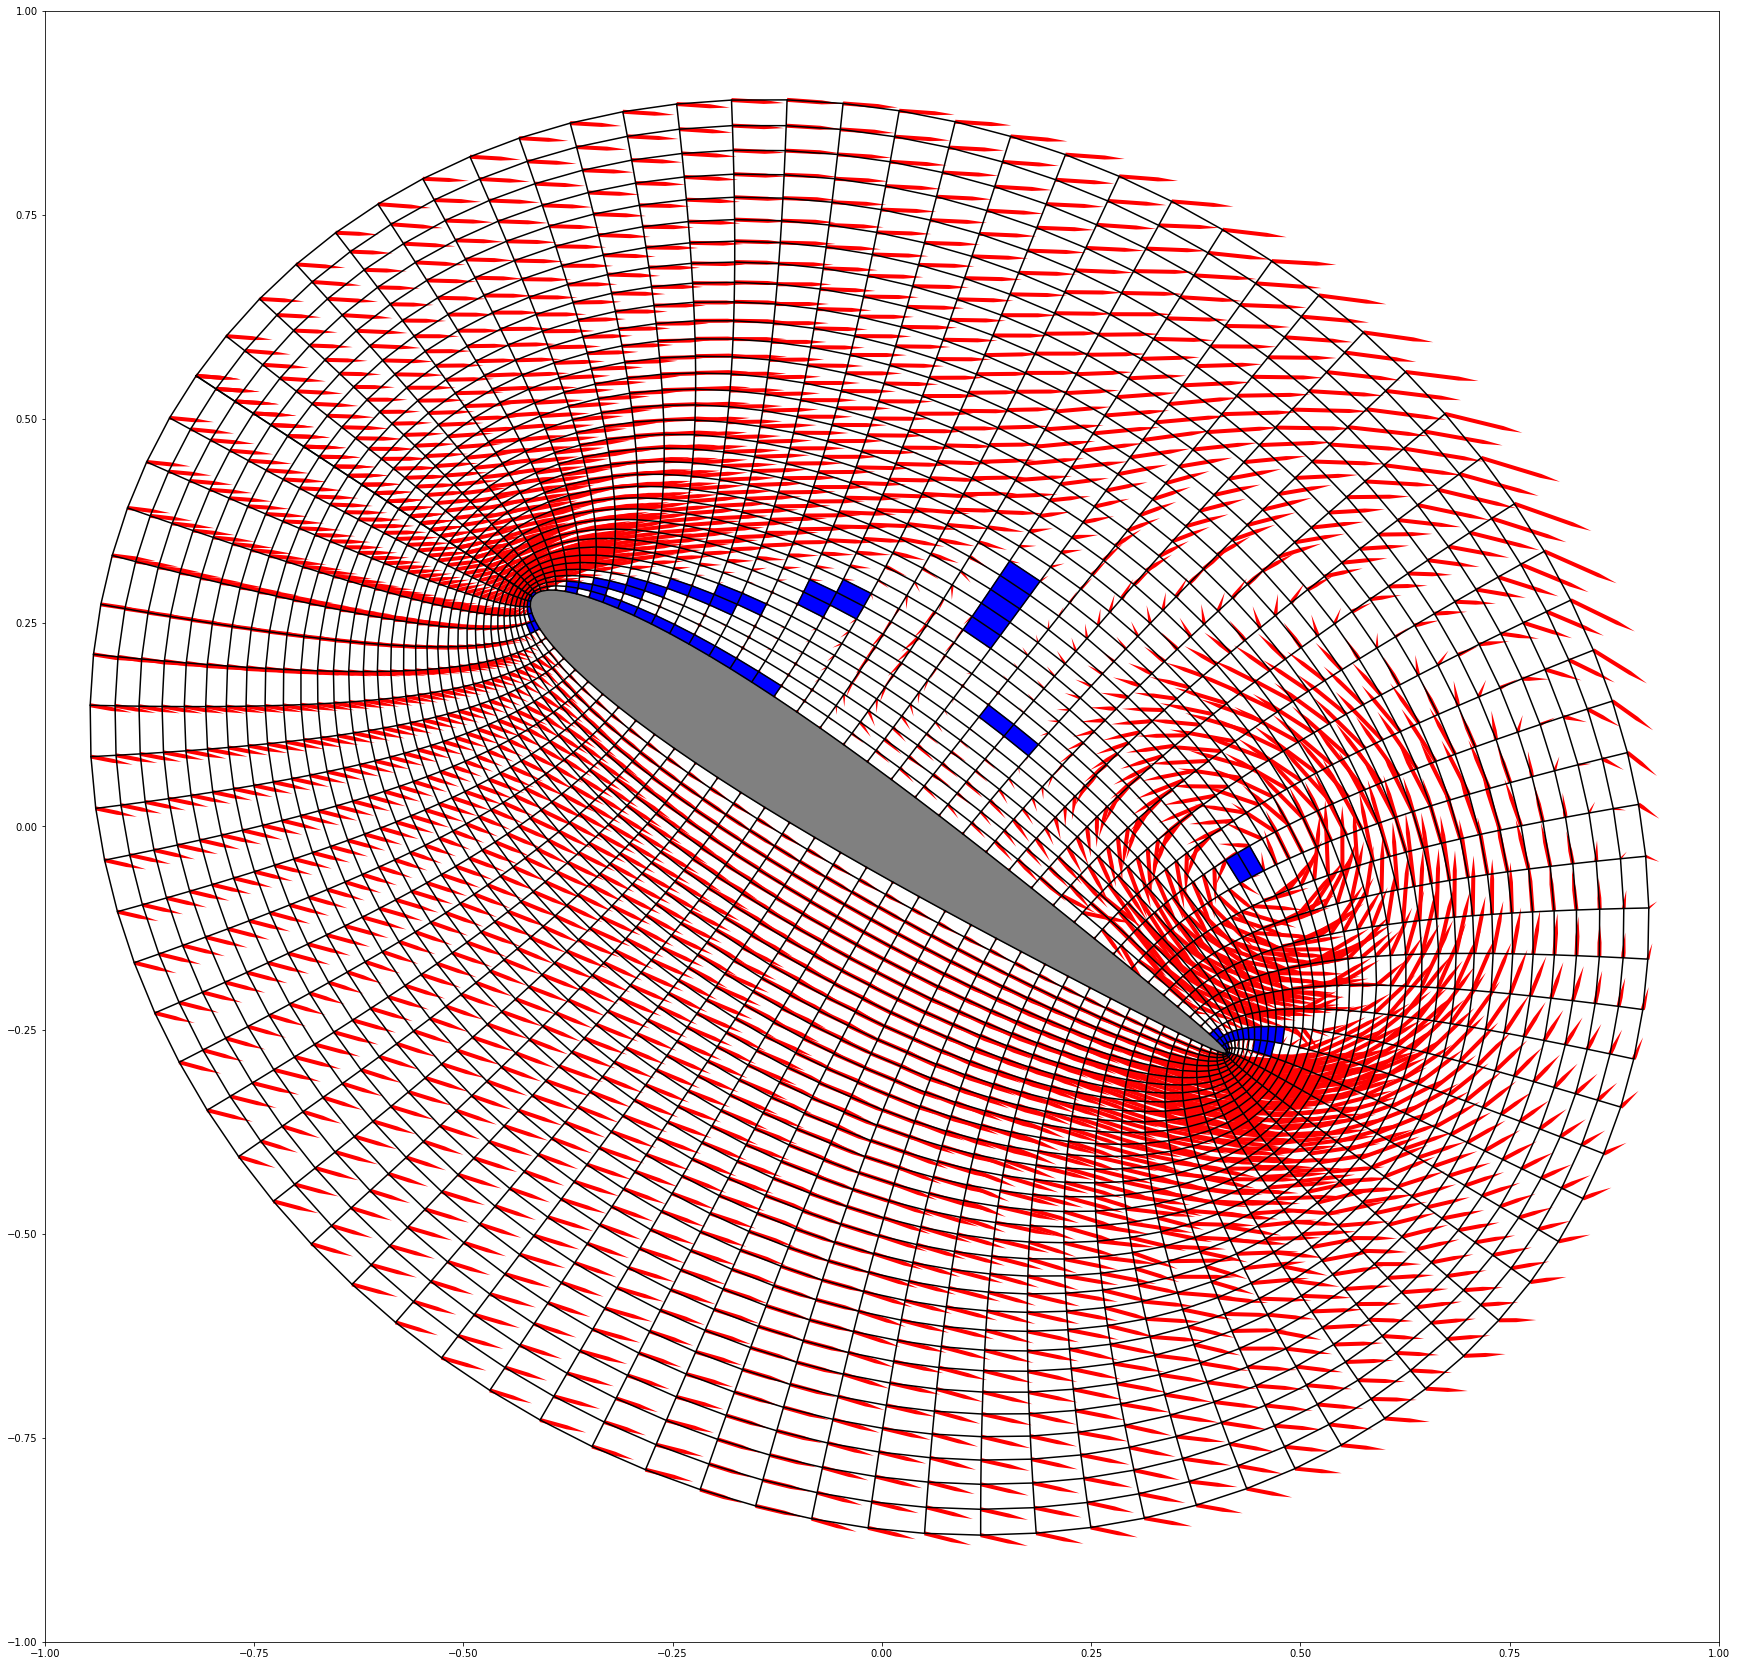

In [7]:
fig, ax = plt.subplots(figsize=(30, 30))  
plt.axis([-1, 1, -1, 1])

def afficher_objet(dispVec=True, dispGrid=True, dispCellule=True):
    
    coords, values = charger_objet("aile")
    
    afficher_profil(coords, "grey")
    
    if dispVec:
        afficher_vitesse(coords, values)
    
    if dispGrid:
        afficher_maillage(coords)
    
    if dispCellule:
        afficher_cellules(coords, values, "blue")
    
    plt.show()

afficher_objet()